# Titanic Disaster Dataset:

https://data.world/nrippner/titanic-disaster-dataset

# Business Understanding:

### Objective:

***Classification of a passenger as either survived or not.***

### Features:

**pclass:** 
>Passenger class: **1**, **2**, **3**

**survived:**
>Target: **0**, **1**

**name:**
>Passenger name.

**sex:**
>Passenger sex: **male**, **female**

**age:**
>Passenger age.

**sibsp:**
>Number of siblings/spouses.

**parch:**
>Number of parents/children.

**ticket:**
>Ticket number.

**fare:**
>Fair paid.

**cabin:**
>Cabin number.

**embarked:**
>Port of embarkation.
>- **C:** Cherbourg
>- **Q:** Queenstown
>- **S:** Southampton

**boat:**
>Lifeboat number (if survived).

**body:**
>Body found number (if not survived and the body was recovered).

In [1]:
import pandas as pd

df = pd.read_csv('https://query.data.world/s/bhuv4w33fxoccisba2aufv3gipusxn')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In the info we observed at most 1309 rows not to be null whilst the dataset is having 1310 rows.

We presume there is one row full of missing values.

In [2]:
df.dropna(how = 'all', inplace = True)
df.shape

(1309, 14)

Next, we observe the "Passenger Class" column:
>- Since upper class passengers may have better opportunities of survival it can be considered as ordinal categorical variable.
>- Passenger class should be an integer but from the info it's listed as a float, we must fix that (be careful of overflow).
>- We look for missing values, if none is found we go for the countplot.

In [3]:
df['pclass'].isna().sum()

0

In [4]:
df['pclass'].unique()

array([1., 2., 3.])

In [5]:
df['pclass'] = df['pclass'].astype('uint8')
df['pclass'].dtype

dtype('uint8')

<AxesSubplot:xlabel='pclass', ylabel='count'>

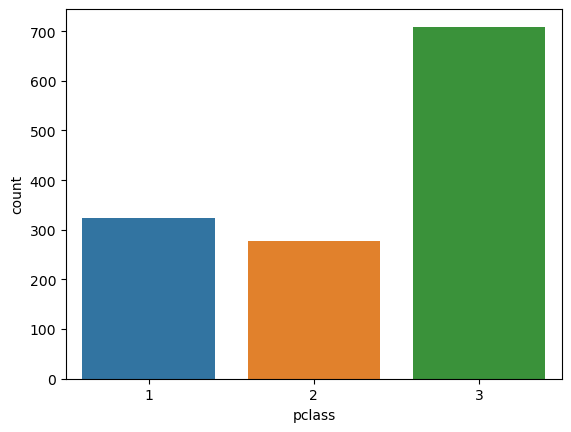

In [6]:
import seaborn as sns

sns.countplot(data = df, x = 'pclass')

Now with the "Passenger Survived" column it is the target of our case study:

>- We should convert it data type to integer.
>- We should examine how balanced is our dataset.

In [7]:
df['survived'] = df['survived'].astype('uint8')

<AxesSubplot:xlabel='survived', ylabel='count'>

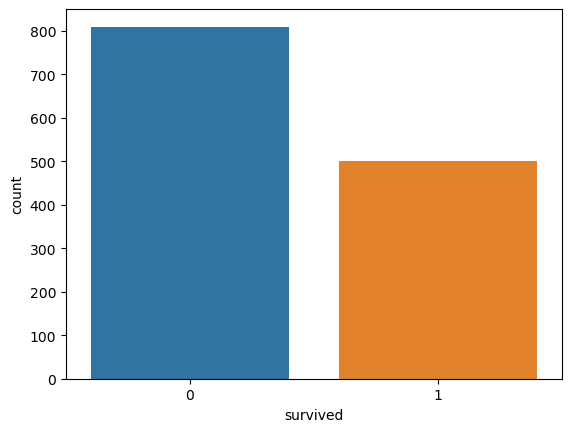

In [8]:
sns.countplot(data = df, x = 'survived')

There exists a slight class imbalance in our dataset.

Taking a look at the "Passenger Name" feature:

>- A person's title could influence his/her survival.
>- We should take a look at how titles are associated with status.

In [9]:
df['name'].unique()

array(['Allen, Miss. Elisabeth Walton', 'Allison, Master. Hudson Trevor',
       'Allison, Miss. Helen Loraine', ..., 'Zakarian, Mr. Mapriededer',
       'Zakarian, Mr. Ortin', 'Zimmerman, Mr. Leo'], dtype=object)

In [10]:
series = df['name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
series.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

- 'Miss' is the same as 'Mlle'
- 'Mrs' is the same as 'Mme' as well as 'Dona'
- 'Don' is the same as 'Mr'

Let's take a look at master.

In [11]:
filt = df['name'].str.contains('Master.')
df[filt]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
54,1,1,"Carter, Master. William Thornton II",male,11.0000,1.0,2.0,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
94,1,1,"Dodge, Master. Washington",male,4.0000,0.0,2.0,33638,81.8583,A34,S,5,NaN,"San Francisco, CA"
249,1,1,"Ryerson, Master. John Borie",male,13.0000,2.0,2.0,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
273,1,1,"Spedden, Master. Robert Douglas",male,6.0000,0.0,2.0,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,3,0,"Skoog, Master. Karl Thorsten",male,10.0000,3.0,2.0,347088,27.9000,NaN,S,NaN,NaN,NaN
1240,3,1,"Thomas, Master. Assad Alexander",male,0.4167,0.0,1.0,2625,8.5167,NaN,C,16,NaN,NaN
1256,3,1,"Touma, Master. Georges Youssef",male,7.0000,1.0,1.0,2650,15.2458,NaN,C,C,NaN,NaN
1262,3,0,"van Billiard, Master. James William",male,NaN,1.0,1.0,A/5. 851,14.5000,NaN,S,NaN,NaN,NaN


- Master is associated with children.

Let's take a look at 'Ms' is it associated with a 'Miss' or a 'Mrs'.

In [12]:
filt = df['name'].str.contains('Ms.')
df[filt]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
546,2,1,"Reynaldo, Ms. Encarnacion",female,28.0,0.0,0.0,230434,13.00,NaN,S,9,NaN,Spain
1076,3,0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.75,NaN,Q,NaN,NaN,NaN


We see the only woman with the title 'Ms' has no spouse on board, so she can be considered a 'Miss'.

Let's take a look at the nobility titles.

In [13]:
titles = ['Lady.', 'Sir.', 'Jonkheer.', 'the Countess.']
filt = df['name'].apply(lambda x: any([y in x for y in titles]))
df[filt]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
99,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1.0,0.0,11755,39.6000,A16,C,1,NaN,London / Paris
100,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1.0,0.0,PC 17485,56.9292,A20,C,1,NaN,London / Paris
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0.0,0.0,19972,0.0000,NaN,S,NaN,NaN,"Rotterdam, Netherlands"
245,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0.0,0.0,110152,86.5000,B77,S,8,NaN,"London Vancouver, BC"


There's to few to establish a pattern, therefore:
>- 'Lady' and 'Countess' are to be replaced with 'Mrs'.
>- 'Sir' and 'jonkheer' are to be replaced with 'Mr'.

Let's take a look at the military titles.

In [14]:
titles = ['Col.', 'Major.', 'Capt.']
filt = df['name'].apply(lambda x: any([y in x for y in titles]))
df[filt]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
10,1,0,"Astor, Col. John Jacob",male,47.0,1.0,0.0,PC 17757,227.525,C62 C64,C,NaN,124.0,"New York, NY"
45,1,0,"Butt, Major. Archibald Willingham",male,45.0,0.0,0.0,113050,26.550,B38,S,NaN,NaN,"Washington, DC"
81,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1.0,1.0,WE/P 5735,71.000,B22,S,NaN,269.0,"Milwaukee, WI"
136,1,1,"Gracie, Col. Archibald IV",male,53.0,0.0,0.0,113780,28.500,C51,C,B,NaN,"Washington, DC"
231,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0.0,0.0,113786,30.500,C104,S,6,NaN,"Toronto, ON"
264,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0.0,0.0,13213,35.500,A26,C,3,NaN,"Basel, Switzerland"
305,1,0,"Weir, Col. John",male,60.0,0.0,0.0,113800,26.550,NaN,S,NaN,NaN,"England Salt Lake City, Utah"


They're quite balanced except for 'Capt' let's replace it with 'Major' since it's the closest.

Let's take a look at the religious titles.

In [15]:
filt = df['name'].str.contains('Rev.')
df[filt]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
335,2,0,"Bateman, Rev. Robert James",male,51.0,0.0,0.0,S.O.P. 1166,12.525,NaN,S,NaN,174.0,"Jacksonville, FL"
357,2,0,"Byles, Rev. Thomas Roussel Davids",male,42.0,0.0,0.0,244310,13.000,NaN,S,NaN,NaN,London
366,2,0,"Carter, Rev. Ernest Courtenay",male,54.0,1.0,0.0,244252,26.000,NaN,S,NaN,NaN,London
431,2,0,"Harper, Rev. John",male,28.0,0.0,1.0,248727,33.000,NaN,S,NaN,NaN,"Denmark Hill, Surrey / Chicago"
472,2,0,"Kirkland, Rev. Charles Leonard",male,57.0,0.0,0.0,219533,12.350,NaN,Q,NaN,NaN,"Glasgow / Bangor, ME"
476,2,0,"Lahtinen, Rev. William",male,30.0,1.0,1.0,250651,26.000,NaN,S,NaN,NaN,"Minneapolis, MN"
507,2,0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.000,NaN,S,NaN,NaN,"Worcester, MA"
532,2,0,"Peruschitz, Rev. Joseph Maria",male,41.0,0.0,0.0,237393,13.000,NaN,S,NaN,NaN,NaN


They can be considered enough to establish a pattern. So we should leave them as are.

Let's take a look at the 'Dr' title.

In [16]:
filt = df['name'].str.contains('Dr.')
df[filt]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
93,1,1,"Dodge, Dr. Washington",male,53.0,1.0,1.0,33638,81.8583,A34,S,13,NaN,"San Francisco, CA"
119,1,1,"Frauenthal, Dr. Henry William",male,50.0,2.0,0.0,PC 17611,133.6500,NaN,S,5,NaN,"New York, NY"
181,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0.0,0.0,17465,25.9292,D17,S,8,NaN,"New York, NY"
206,1,0,"Minahan, Dr. William Edward",male,44.0,2.0,0.0,19928,90.0000,C78,Q,NaN,230.0,"Fond du Lac, WI"
278,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0.0,0.0,13214,30.5000,B50,C,3,NaN,"Basel, Switzerland"
398,2,1,"Drew, Master. Marshall Brines",male,8.0,0.0,2.0,28220,32.5000,NaN,S,10,NaN,"Greenport, NY"
399,2,0,"Drew, Mr. James Vivian",male,42.0,1.0,1.0,28220,32.5000,NaN,S,NaN,NaN,"Greenport, NY"


It's perfect.

Now, let's apply the replacements.

In [17]:
series.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [18]:
series.replace({
    'Mme': 'Mrs',
    'Capt': 'Major',
    'Lady': 'Mrs',
    'Sir': 'Mr',
    'Mlle': 'Miss',
    'Dona': 'Mrs',
    'Jonkheer': 'Mr',
    'the Countess': 'Mrs',
    'Don': 'Mr',
    'Ms': 'Miss'
}, inplace = True)

series.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Dr', 'Major', 'Rev'],
      dtype=object)

In [19]:
df['name'] = series
df.rename(columns = {'name': 'title'}, inplace = True)
df

,pclass,survived,title,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Miss,female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,Master,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,Miss,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,Mr,male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,Mrs,female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Miss,female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,Miss,female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,Mr,male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Mr,male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


Let's observe their survival rates.

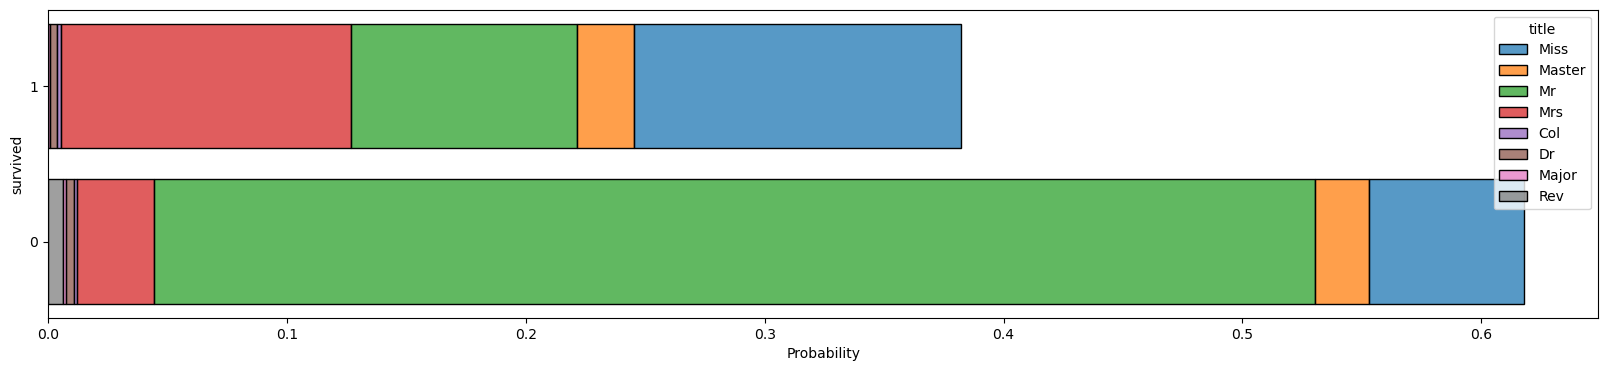

In [20]:
from matplotlib import pyplot as plt

plt.figure(figsize = (20, 4))
ax = sns.histplot(data = df, y = 'survived', hue = 'title', multiple = 'stack', stat = 'probability', common_norm = True, bins = 2, shrink = 0.8)
ax.set_yticks([0.25, 0.75], labels = [0, 1])

Looking at the deaths, mostly are men with the title Mr. the rest is much less. There's a also a severe imbalance in our title categories, converting those titles to ordinal would be risky. So we stick to them being nominal.

Next, comes passenger sex:
>- We look for missing values, if none is found we go for the countplot.
>- We investigate the connection between passenger sex and passenger survival.

In [21]:
df['sex'].isna().sum()

0

<AxesSubplot:xlabel='sex', ylabel='count'>

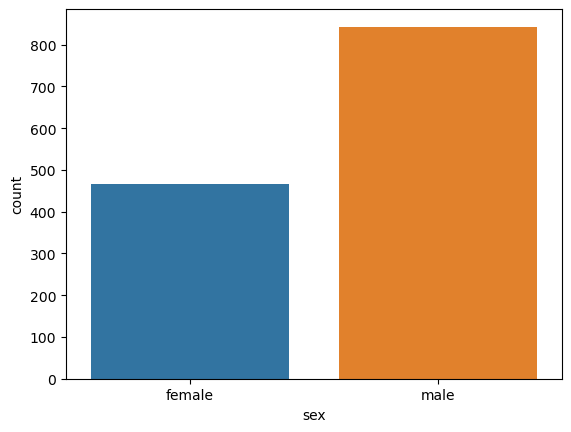

In [22]:
sns.countplot(data = df, x = 'sex')

<AxesSubplot:xlabel='sex', ylabel='count'>

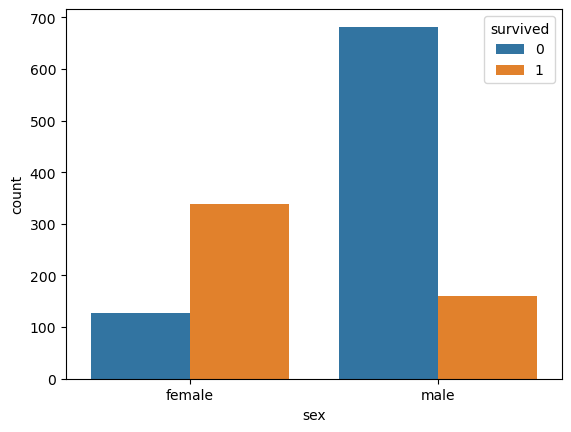

In [23]:
sns.countplot(data = df, x = 'sex', hue = 'survived')

There are twice as much male passengers as female passengers but there's twice as much female passengers that survived compared to male passengers and the mortality rate among men is five times that of women.

We may consider women privileged in these unfortunate set of circumstances. If there were more than two categories in this feature we could've considered it ordinal.

Next, we move on to the passenger age column:
>- Age is a continuous feature, therefore its probability distribution must be observed.
>- Missing values are to be inspected.

<AxesSubplot:xlabel='age', ylabel='Density'>

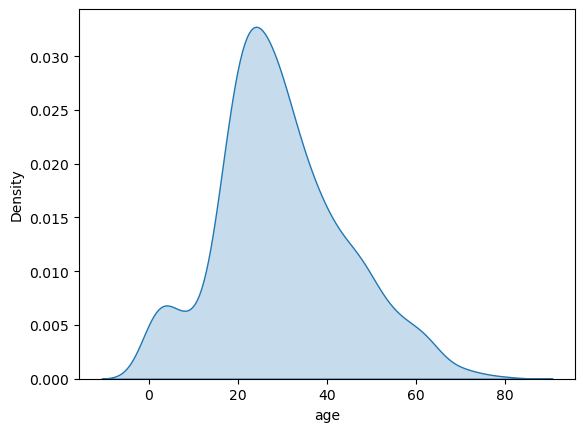

In [24]:
sns.kdeplot(data = df, x = 'age', fill = True)

In [25]:
df['age'].isna().mean()

0.20091673032849502

The number of missing values in age is so high we can't impute them (they could cause our model to go underfit) and from the business understanding point of view, age is a strong influencer on the survival odds of the passenger, therefore, we should drop all rows having missing age values.

In [26]:
df.dropna(subset = ['age'], inplace = True)

We could determine the mathematical outliers here but age at extremes could be determinal to the possibility of survival positively or negatively, therefore we should keep them.

<AxesSubplot:xlabel='survived', ylabel='count'>

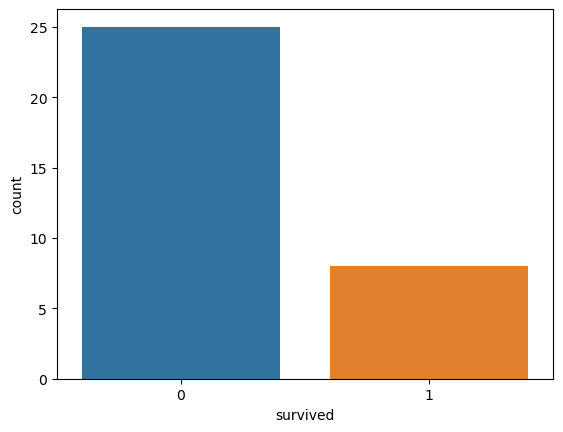

In [27]:
filt = df['age'] > 60
sns.countplot(data = df[filt], x = 'survived')

<AxesSubplot:xlabel='survived', ylabel='count'>

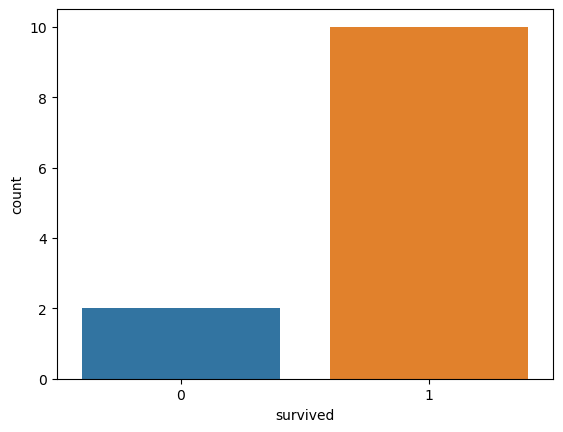

In [28]:
filt = df['age'] < 1
sns.countplot(data = df[filt], x = 'survived')

Next we have the "Number of Siblings/Spouses" column:
>- From a business understanding perspective this feature could be considered an ordinal categorical one, meaning, as the category grows higher in rank the more this might affect the survival rate of the passenger.
>- We check for its missing values.

In [29]:
df['sibsp'].isna().mean()

0.0

Since we have no missing values, we should cast its contents from float to integer (a missing value of NaN is considered a float).

In [30]:
df['sibsp'] = df['sibsp'].astype('uint8')

<AxesSubplot:xlabel='sibsp', ylabel='count'>

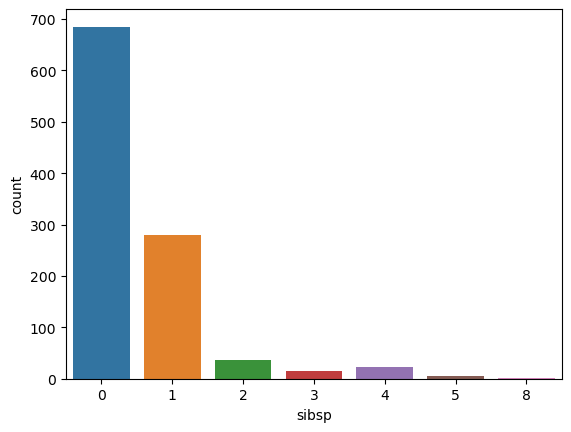

In [31]:
sns.countplot(data = df, x = 'sibsp')

Now, we go for "Number of Parents/Children" feature:
>Same as sibsp

In [32]:
df['parch'].isna().mean()

0.0

In [33]:
df['parch'] = df['parch'].astype('uint8')

<AxesSubplot:xlabel='parch', ylabel='count'>

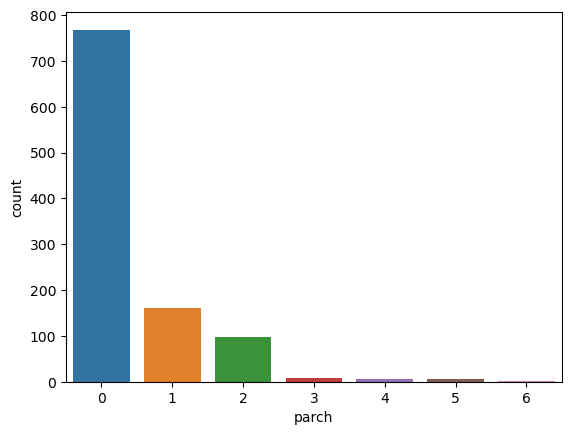

In [34]:
sns.countplot(data = df, x = 'parch')

Now, we go for the "Ticket Number" feature:
>- Ticket number could somehow be connected to the survival rate, but there's not much info to go on with this, so we could either invest more time in business and data understanding on it or drop it at face value.
>- Before dropping the ticket number column we might need to observe if a number of passengers share the same ticket because this could affect the passenger fare feature.

In [35]:
series = df['ticket'].value_counts()
filt = series > 1
filt.sum()

181

This means that more than one passenger has boarded using the same ticket.
Let's take a look at the ticket with the most passengers.

In [36]:
x = series[filt].index[0]

In [37]:
filt = df['ticket'] == x
df[filt]

,pclass,survived,title,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
825,3,0,Master,male,9.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
826,3,0,Master,male,1.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
827,3,0,Master,male,11.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
828,3,0,Miss,female,10.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
829,3,0,Miss,female,16.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
830,3,0,Mr,male,14.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
831,3,0,Mr,male,40.0,1,6,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
832,3,0,Mrs,female,43.0,1,6,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"


It turns out it belonged to a man and his wife along with their six children.

From here, we can see having more passengers share a ticket may increase its price.

In [38]:
df.drop('ticket', axis = 1, inplace = True)

Let's take a look at the "Passenger Fare" feature:

>- We must check for the missing values.
>- We must check for mathematical outliers. After which, we could check if we would remove them or not.

In [39]:
filt = df['fare'].isna()
filt.sum()

1

In [40]:
df[filt]

,pclass,survived,title,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
1225,3,0,Mr,male,60.5,0,0,NaN,NaN,S,NaN,261.0,NaN


We have one passenger missing his fare, we can impute it using the median of fares paid by passengers in the same passenger class and with no relatives on board.

In [41]:
series = df.groupby(['pclass', 'sibsp', 'parch'])['fare'].median()
df.loc[filt, 'fare'] = series[(3, 0, 0)]
df[filt]

,pclass,survived,title,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
1225,3,0,Mr,male,60.5,0,0,7.8792,NaN,S,NaN,261.0,NaN


<AxesSubplot:xlabel='fare', ylabel='Density'>

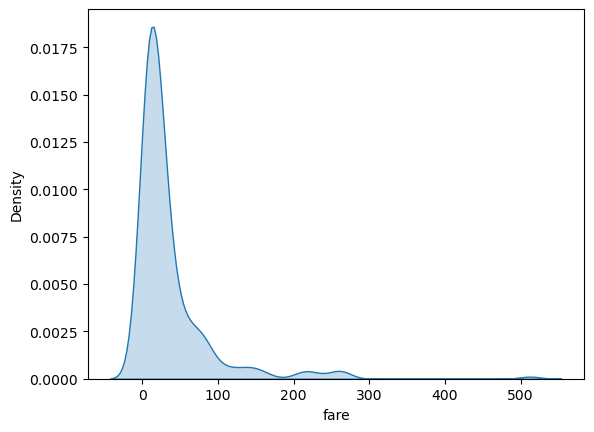

In [42]:
sns.kdeplot(data = df, x = 'fare', fill = True)

As we can see there exists some mathematical outliers here, still keeping them would allow the model to use them as an indicator of the survival rate.

Let's take a look at the "Passenger Cabin" feature:
>- Passengers on the same ticket registered to more than one cabin could be affected in their odds of survival.
>- Cabin location could very much affect the passenger's survival rate and therefore could be arranged in an ordinal fashion, but this requires a lot of work to be done on business understanding, otherwise we could consider them nominal but in such case they most probably should be dropped as a column (when one-hot encoded on the cabin level could be impractical).
>- We must check for the missing values.

In [43]:
df['cabin'].isna().mean()

0.739961759082218

That's alot of missing values. Let's by the way take a look at the cabin numbers available.

In [44]:
df['cabin'].nunique()

174

In [45]:
df['cabin'].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'E58', 'E49', 'E52', 'E45', 'B22',
       'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20',
       'A18', 'C54', 'C45', 'D20', 'A29', 'E25', 'C111', 'C23 C25 C27',
       'E36', 'D40', 'B39', 'B41', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10 D12', 'B82 B84', 'E50',
       'D33', 'C83', 'B94', 'D49', 'B69', 'B11', 'C39', 'B18', 'D11',
       'C93', 'B28', 'C49', 'B52 B54 B56', 'E60', 'C132', 'B37', 'D21',
       'D19', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79',
       'D30', 'C90', 'E46', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48',
       'D47', 'C105', 'B36', 'B30', 'D43', 'C124', 'B24', 'C2', 'C

We notice that the cabin name always starts with a letter, this letter stands for the deck. The lower the deck the lower the chance of survival. 

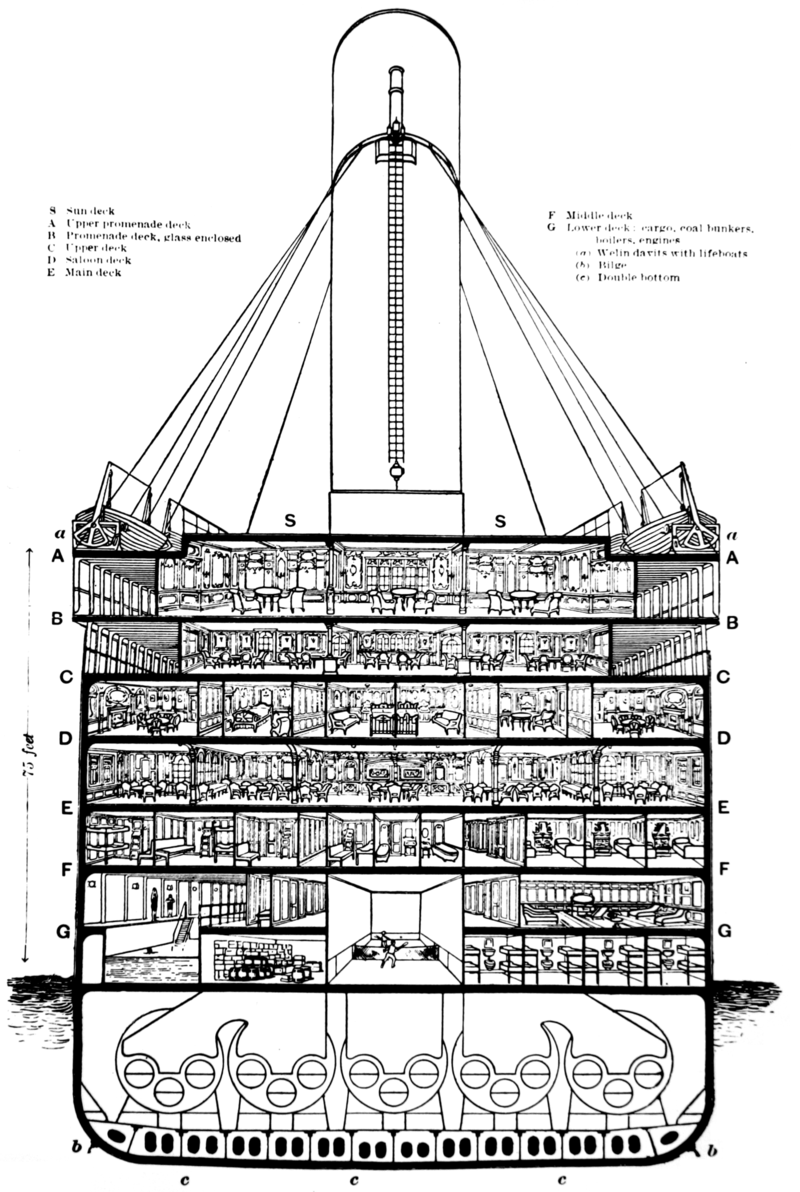

So from the 174 categories we could only extract the decks as an abstract feature. So a feature with 174 nominal categories could be replaced with only 7 ordinal ones, much better. Still we have 75% of them missing so it's not our first priority.

In [46]:
df.drop('cabin', axis = 1, inplace = True)

Looking at the passenger's "Port of Embarkation" feature:
>- First, let's check out the missing values.
>- We seek to make them ordinal instead of nominal, as different ports have people of different cultures and habits that may influence the survival rates.

In [47]:
filt = df['embarked'].isna()
filt.sum()

2

For 2 points let's remove them.

In [48]:
df.drop(filt[filt].index, inplace = True)

<AxesSubplot:xlabel='embarked', ylabel='count'>

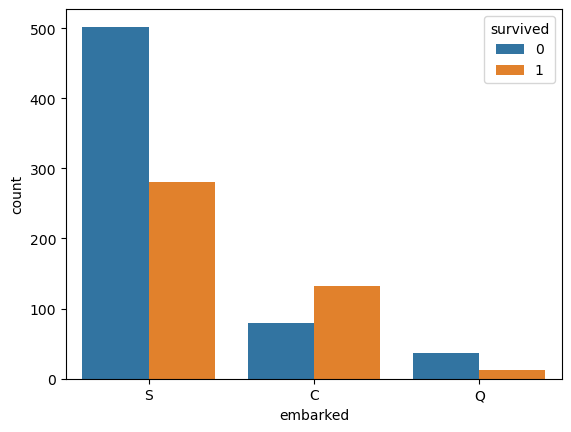

In [49]:
sns.countplot(data = df, x = 'embarked', hue = 'survived')

We can see that more than one third the people embarked from Southampton survived, while those from Cherbourg two thirds of them survived, whilst from Queenstown less than one third survived.

Therefore, Cherbourg is the highest followed by Southampton followed by Queenstown.

The "Boat Number" feature should reflect the survival as a target, so it may never be used as a feature.

But we could check if a someone rode a boat and died in it because then that would be an exception that has to be dropped before dropping the column.

In [50]:
filt = ~df['boat'].isna() & (df['survived'] == 0)
df[filt]

,pclass,survived,title,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest
19,1,0,Mr,male,36.0,0,0,75.2417,C,A,NaN,"Winnipeg, MN"
544,2,0,Mr,male,34.0,1,0,21.0000,S,12,NaN,"Elizabeth, NJ"
655,3,0,Mr,male,32.0,1,0,15.8500,S,D,NaN,"Ruotsinphytaa, Finland New York, NY"
853,3,0,Mr,male,25.0,0,0,7.2500,S,B,NaN,NaN
968,3,0,Mr,male,36.0,1,0,15.5500,S,A,NaN,NaN
969,3,0,Mrs,female,30.0,1,0,15.5500,S,A,NaN,NaN
1299,3,0,Mr,male,27.0,1,0,14.4542,C,C,NaN,NaN


Those people didn't survive, still they rode the safety boats. We should remove them. Then we can remove the column.

In [51]:
df.drop(filt[filt].index, inplace = True)

In [52]:
df.drop('boat', axis = 1, inplace = True)

The "Boat Number" is the same as the "Safety Boat Number" feature, it's indicates the target. So it should be removed.

In [53]:
df.drop('body', axis = 1, inplace = True)

The "Passenger Home - Destination" requires alot of preprocessing and would give us alot of nominal categories, still we can broaden those categories and make them less, that would take too much time.

In [54]:
df.drop('home.dest', axis = 1, inplace = True)

In [55]:
df

,pclass,survived,title,sex,age,sibsp,parch,fare,embarked
0,1,1,Miss,female,29.0000,0,0,211.3375,S
1,1,1,Master,male,0.9167,1,2,151.5500,S
2,1,0,Miss,female,2.0000,1,2,151.5500,S
3,1,0,Mr,male,30.0000,1,2,151.5500,S
4,1,0,Mrs,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1301,3,0,Mr,male,45.5000,0,0,7.2250,C
1304,3,0,Miss,female,14.5000,1,0,14.4542,C
1306,3,0,Mr,male,26.5000,0,0,7.2250,C
1307,3,0,Mr,male,27.0000,0,0,7.2250,C


Now, let's apply those changes.

Now, let's apply the changes:

>- "Passenger Sex" is to be changed with "Is Passenger Female?".
>- "Port of Embarkation" is to be ordinally encoded with Cherbourg as 1, Southampton as 2 and Queenstown as 3.
>- "Passenger Title" is to be one-hot encoded since it's being treated as a nominal categorical feature.

In [56]:
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})
df.rename(columns = {'sex': 'female'})

df['embarked'] = df['embarked'].replace({'C': 1, 'S': 2, 'Q': 3})

df = pd.get_dummies(data = df, columns = ['title'], drop_first = True)

df

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title_Dr,title_Major,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev
0,1,1,1,29.0000,0,0,211.3375,2,0,0,0,1,0,0,0
1,1,1,0,0.9167,1,2,151.5500,2,0,0,1,0,0,0,0
2,1,0,1,2.0000,1,2,151.5500,2,0,0,0,1,0,0,0
3,1,0,0,30.0000,1,2,151.5500,2,0,0,0,0,1,0,0
4,1,0,1,25.0000,1,2,151.5500,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,0,45.5000,0,0,7.2250,1,0,0,0,0,1,0,0
1304,3,0,1,14.5000,1,0,14.4542,1,0,0,0,1,0,0,0
1306,3,0,0,26.5000,0,0,7.2250,1,0,0,0,0,1,0,0
1307,3,0,0,27.0000,0,0,7.2250,1,0,0,0,0,1,0,0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = df.drop('survived', axis = 1).values
y = df['survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7576923076923077

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler',StandardScaler()),
                     ('model',LogisticRegression(solver='saga',penalty='l2',l1_ratio =1.0,max_iter=10000,C=1.0))])
pipeline.fit(X_train,y_train)
y_probs = pipeline.predict_proba(X_test)[:,1]
y_pred = y_probs >=0.41
accuracy_score(y_test, y_pred)


C:\Users\mhbk8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


0.85

In [59]:
y_hat = pipeline.predict_proba(X_test)[:,1]
y_hat

array([0.9356532 , 0.35488061, 0.96400068, 0.26780841, 0.93037722,
       0.12922705, 0.10611719, 0.20783676, 0.78196152, 0.12180362,
       0.08924099, 0.08474164, 0.10875527, 0.03879913, 0.09135401,
       0.1087685 , 0.08911472, 0.12002171, 0.04017105, 0.04959067,
       0.20336262, 0.05917883, 0.33429387, 0.18606114, 0.02165191,
       0.09370357, 0.75108124, 0.80603803, 0.09844124, 0.10112249,
       0.11146879, 0.51470071, 0.78076284, 0.81391026, 0.80534714,
       0.72021054, 0.82123101, 0.41315529, 0.10875711, 0.28843058,
       0.65759037, 0.79102563, 0.72480681, 0.07462426, 0.25085016,
       0.39431911, 0.78641726, 0.69645142, 0.5573629 , 0.39522987,
       0.6168664 , 0.59443921, 0.33848189, 0.77302048, 0.36926596,
       0.34340117, 0.37113382, 0.33849367, 0.23145859, 0.25674141,
       0.57209715, 0.78355149, 0.08691774, 0.95130662, 0.04770522,
       0.22686475, 0.21843186, 0.68889955, 0.39947908, 0.16989294,
       0.0826539 , 0.93291886, 0.07084723, 0.8089477 , 0.78663

In [60]:
y_pred = (y_hat>=0.5).astype('int')
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

Text(0.5, 1.0, 'Confusion Matrix')

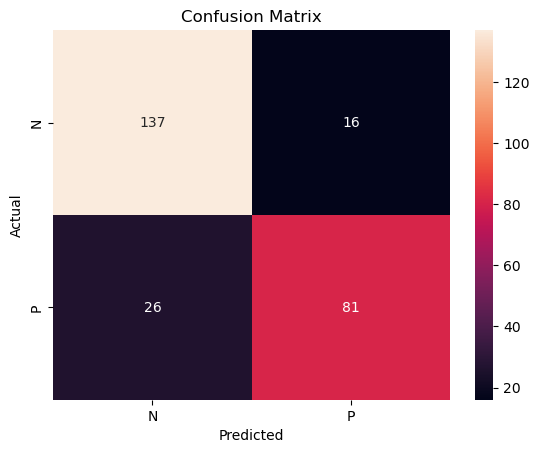

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
arr = confusion_matrix(y_test,y_pred)
indices = ['N','P']
conf_df = pd.DataFrame(arr,index = ['N','P'],columns =['N','P'])
ax = sns.heatmap(conf_df,annot = True,fmt='0')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')


In [62]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
print(f'Accuracy : {accuracy_score(y_test,y_pred)}')
print(f'Recall : {recall_score(y_test,y_pred)}')
print(f'Precision : {precision_score(y_test,y_pred)}')
print(f'f1 : {f1_score(y_test,y_pred)}')

Accuracy : 0.8384615384615385
Recall : 0.7570093457943925
Precision : 0.8350515463917526
f1 : 0.7941176470588236


Seeing that, we could convert the continuous features of 'fare' and 'age' to ordinal categoricals.

<AxesSubplot:xlabel='fare', ylabel='Count'>

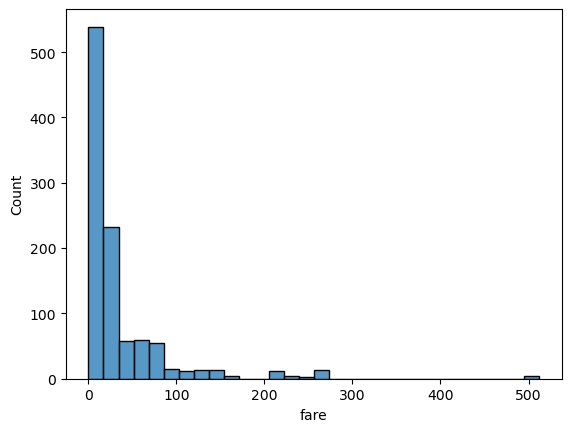

In [63]:
sns.histplot(data = df, x = 'fare', bins = 30)

We could consider a fare step of 20.0 USD to ordinally encode the fare feature.

<AxesSubplot:xlabel='fare', ylabel='Count'>

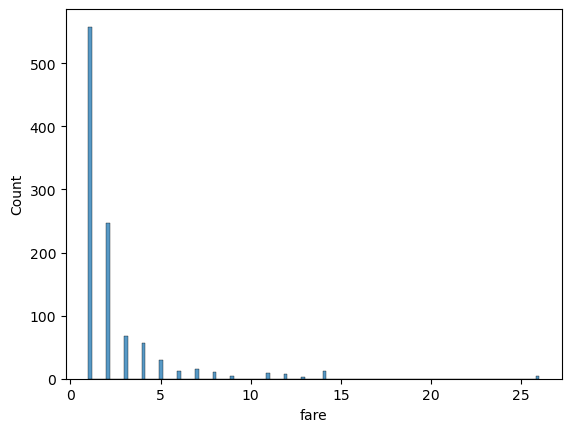

In [64]:
def to_ordinal(x, step):
    return x // step + 1

df['fare'] = df['fare'].apply(lambda x: to_ordinal(x, 20.0))

sns.histplot(data = df, x = 'fare')

We could consider an age step of 10 years to ordinally encode the age feature.

<AxesSubplot:xlabel='age', ylabel='Count'>

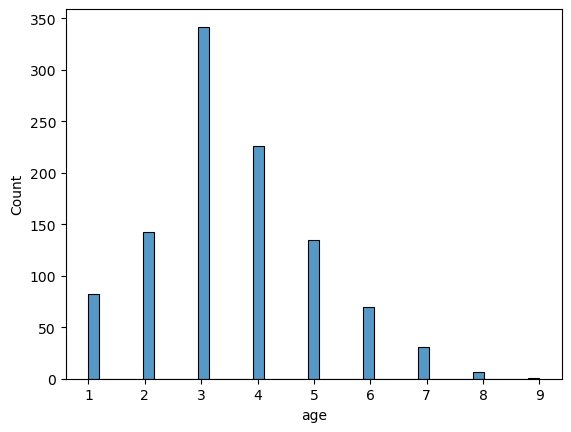

In [65]:
df['age'] = df['age'].apply(lambda x: to_ordinal(x, 10.0))

sns.histplot(data = df, x = 'age')

Considering the considerable imbalance present in the dataset we could go for the Complement Naive Bayes.

In [66]:
from sklearn.naive_bayes import ComplementNB

X = df.drop('survived', axis = 1).values
y = df['survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

model = ComplementNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7769230769230769

We've improved our predictive ability to this dataset by ~2%.

Let's manually tune the alpha hyperparameter.

C:\Users\mhbk8\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


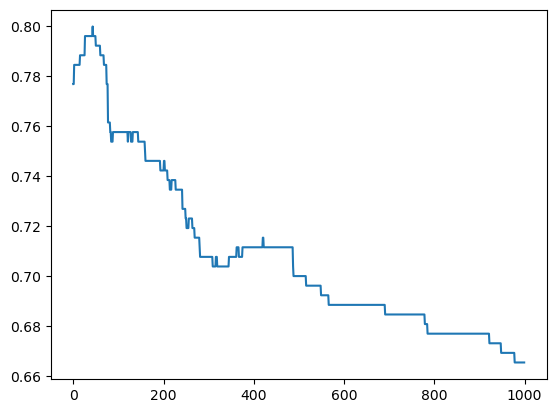

In [67]:
accs = []
alphas = range(1000)

for i in alphas:

    model = ComplementNB(alpha = i)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    
    accs.append(acc)
    
plt.plot(alphas, accs)

In [68]:
import numpy as np

best_alpha = np.argmax(accs)
best_alpha

43

In [69]:
model = ComplementNB(alpha = best_alpha)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8

In [70]:
from sklearn.neighbors import KNeighborsClassifier
accs = []
ks = list(range(3, 51))
for k in ks:
    model2 = KNeighborsClassifier(n_neighbors = k,
                                 metric = 'minkowski',
                                 p = 2)
    model2.fit(X_train, y_train)
    y_pred2 = model2.predict(X_test)
    acc2 = model2.score(X_test, y_test)
    accs.append(acc2)
i = np.argmax(accs)
ks[i]    

C:\Users\mhbk8\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mhbk8\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

27

In [71]:
model = KNeighborsClassifier(n_neighbors = 27,metric = 'minkowski',p=2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

C:\Users\mhbk8\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.823076923076923

This is a further ~3% improvement.

Tuning the steps used in the to_ordinal function could further improve our model.